In [1]:
!sudo cp -r /content/drive/MyDrive/consultancy/ /content/
%cd /content/consultancy/

/content/consultancy


In [37]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [44]:
print("a => Nifty50")
print("b => BSE Sensex")
option = input("Select file")
if option=="a":
  File = "^NSEI.csv"
elif option == "b":
  File = "BSE.csv"

path = "/content/consultancy/" + File

df = pd.read_csv(path, index_col=False)

a => Nifty50
b => BSE Sensex
Select fileb


In [45]:
df.head()

,Date,Open,High,Low,Close
0,2-January-2007,13827.77,13980.54,13797.44,13942.24
1,3-January-2007,13969.45,14035.67,13897.42,14014.92
2,4-January-2007,14029.04,14060.35,13850.38,13871.71
3,5-January-2007,13768.79,13971.82,13763.39,13860.52
4,8-January-2007,13855.89,13855.89,13599.87,13652.15


In [46]:
df.tail()

,Date,Open,High,Low,Close
3601,16-July-2021,53244.40,53290.81,52997.09,53140.06
3602,19-July-2021,52606.99,52821.17,52405.89,52553.40
3603,20-July-2021,52432.88,52465.03,52013.51,52198.51
3604,22-July-2021,52494.56,52867.26,52471.23,52837.21
3605,23-July-2021,52967.87,53114.70,52653.77,52975.80


In [47]:
df.dropna()

,Date,Open,High,Low,Close
0,2-January-2007,13827.77,13980.54,13797.44,13942.24
1,3-January-2007,13969.45,14035.67,13897.42,14014.92
2,4-January-2007,14029.04,14060.35,13850.38,13871.71
3,5-January-2007,13768.79,13971.82,13763.39,13860.52
4,8-January-2007,13855.89,13855.89,13599.87,13652.15
...,...,...,...,...,...
3601,16-July-2021,53244.40,53290.81,52997.09,53140.06
3602,19-July-2021,52606.99,52821.17,52405.89,52553.40
3603,20-July-2021,52432.88,52465.03,52013.51,52198.51
3604,22-July-2021,52494.56,52867.26,52471.23,52837.21


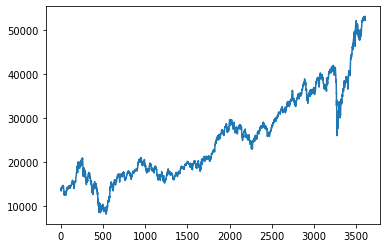

In [48]:
df['Close'].plot()


In [49]:
# df.columns = ['ds','y']
df_final = df.reset_index()[['Date', 'Close']].rename({'Date':'ds', 'Close':'y'}, axis='columns')
df_final.head()

,ds,y
0,2-January-2007,13942.24
1,3-January-2007,14014.92
2,4-January-2007,13871.71
3,5-January-2007,13860.52
4,8-January-2007,13652.15


In [ ]:
# df_final.drop(144,axis=0,inplace=True)

In [50]:
df_final['ds'] = pd.to_datetime(df_final['ds'])

In [51]:
from fbprophet import Prophet

In [52]:
df_final.dropna(axis=0,inplace=True)

# Prediction for next year

In [53]:
model=Prophet()

In [54]:
train=df_final
train

,ds,y
0,2007-01-02,13942.24
1,2007-01-03,14014.92
2,2007-01-04,13871.71
3,2007-01-05,13860.52
4,2007-01-08,13652.15
...,...,...
3601,2021-07-16,53140.06
3602,2021-07-19,52553.40
3603,2021-07-20,52198.51
3604,2021-07-22,52837.21


In [55]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
future_dates=model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
3966,2022-07-19
3967,2022-07-20
3968,2022-07-21
3969,2022-07-22
3970,2022-07-23


In [57]:
prediction=model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3966,2022-07-19,50532.711560,47185.590481,55216.378500,47803.847864,53567.793453,411.486916,411.486916,411.486916,-26.049429,-26.049429,-26.049429,437.536344,437.536344,437.536344,0.0,0.0,0.0,50944.198476
3967,2022-07-20,50543.881786,47340.081825,55292.001959,47803.872114,53587.559676,368.484139,368.484139,368.484139,-60.465473,-60.465473,-60.465473,428.949612,428.949612,428.949612,0.0,0.0,0.0,50912.365925
3968,2022-07-21,50555.052013,46952.965833,55321.649999,47802.932690,53596.274180,402.216466,402.216466,402.216466,-15.172782,-15.172782,-15.172782,417.389248,417.389248,417.389248,0.0,0.0,0.0,50957.268479
3969,2022-07-22,50566.222240,47231.032643,55414.390609,47801.571595,53609.969822,379.353046,379.353046,379.353046,-23.609030,-23.609030,-23.609030,402.962075,402.962075,402.962075,0.0,0.0,0.0,50945.575285
3970,2022-07-23,50577.392466,47412.310043,55068.481650,47800.210500,53641.934588,515.788508,515.788508,515.788508,129.976246,129.976246,129.976246,385.812262,385.812262,385.812262,0.0,0.0,0.0,51093.180974


In [58]:
prediction[2970:-1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2970,2018-12-31,36056.097863,33530.797829,39264.425719,36056.097863,36056.097863,341.662768,341.662768,341.662768,-33.015279,-33.015279,-33.015279,374.678046,374.678046,374.678046,0.0,0.0,0.0,36397.760630
2971,2019-01-01,36067.268089,33364.283896,39423.793048,36067.268089,36067.268089,366.790095,366.790095,366.790095,-26.049429,-26.049429,-26.049429,392.839523,392.839523,392.839523,0.0,0.0,0.0,36434.058184
2972,2019-01-02,36078.438316,33469.017687,39171.258310,36078.438316,36078.438316,350.550828,350.550828,350.550828,-60.465473,-60.465473,-60.465473,411.016301,411.016301,411.016301,0.0,0.0,0.0,36428.989144
2973,2019-01-03,36089.608543,33643.090770,39237.028782,36089.608543,36089.608543,413.817249,413.817249,413.817249,-15.172782,-15.172782,-15.172782,428.990032,428.990032,428.990032,0.0,0.0,0.0,36503.425792
2974,2019-01-04,36100.778769,33672.870258,39505.165330,36100.778769,36100.778769,422.919942,422.919942,422.919942,-23.609030,-23.609030,-23.609030,446.528972,446.528972,446.528972,0.0,0.0,0.0,36523.698711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2022-07-18,50521.541333,47007.692181,55483.372169,47804.082581,53535.040142,410.067620,410.067620,410.067620,-33.015279,-33.015279,-33.015279,443.082899,443.082899,443.082899,0.0,0.0,0.0,50931.608953
3966,2022-07-19,50532.711560,47185.590481,55216.378500,47803.847864,53567.793453,411.486916,411.486916,411.486916,-26.049429,-26.049429,-26.049429,437.536344,437.536344,437.536344,0.0,0.0,0.0,50944.198476
3967,2022-07-20,50543.881786,47340.081825,55292.001959,47803.872114,53587.559676,368.484139,368.484139,368.484139,-60.465473,-60.465473,-60.465473,428.949612,428.949612,428.949612,0.0,0.0,0.0,50912.365925
3968,2022-07-21,50555.052013,46952.965833,55321.649999,47802.932690,53596.274180,402.216466,402.216466,402.216466,-15.172782,-15.172782,-15.172782,417.389248,417.389248,417.389248,0.0,0.0,0.0,50957.268479


In [59]:
df_final[2970:-115]

,ds,y
2970,2018-12-31,36068.33
2971,2019-01-01,36254.57
2972,2019-01-02,35891.52
2973,2019-01-03,35513.71
2974,2019-01-04,35695.10
...,...,...
3486,2021-01-28,46874.36
3487,2021-01-29,46285.77
3488,2021-02-01,48600.61
3489,2021-02-02,49797.72


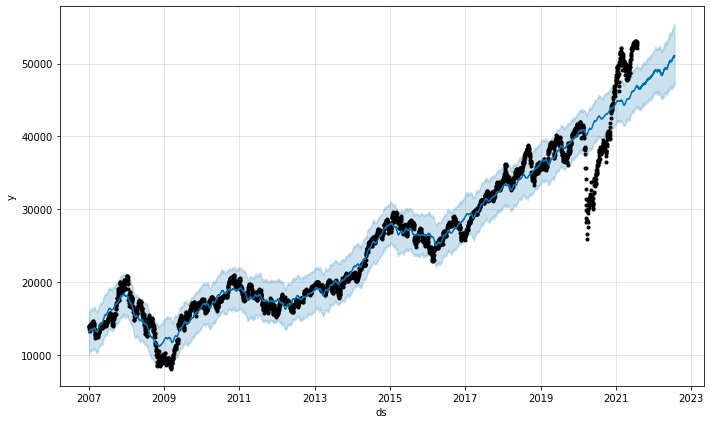

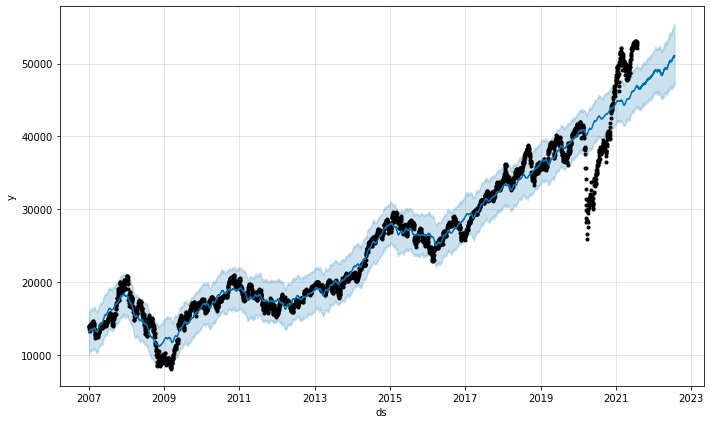

In [60]:
# prediction['trend'].plot()
model.plot(prediction)

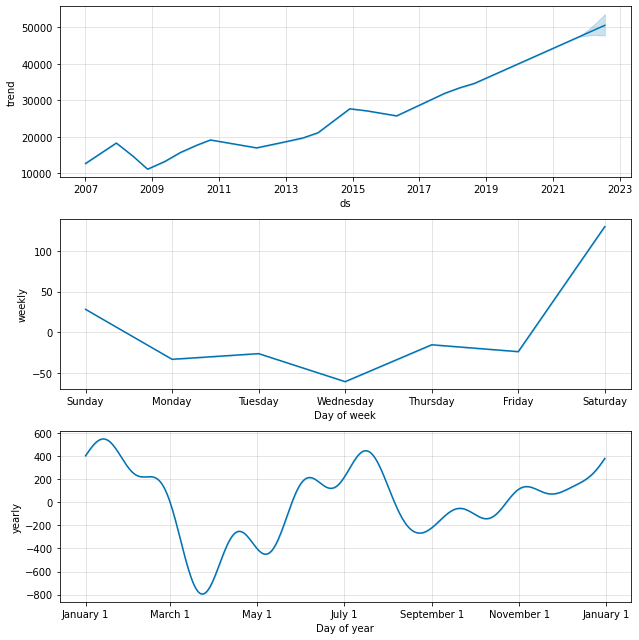

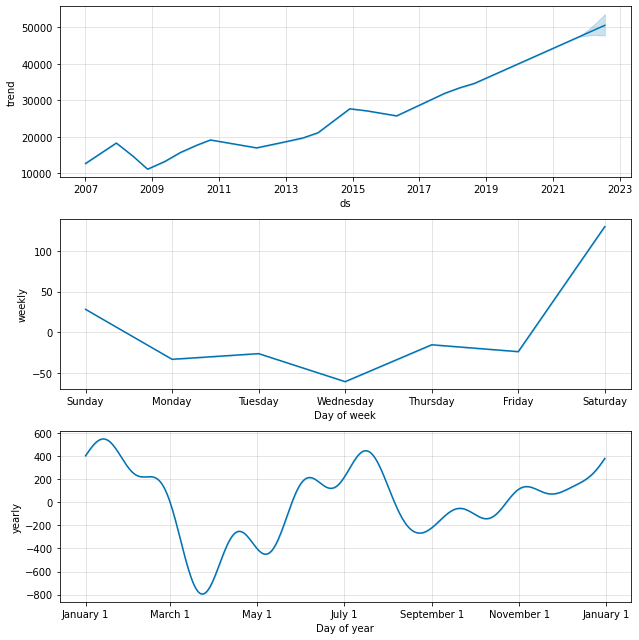

In [61]:
model.plot_components(prediction)

In [21]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='100 days', period='20 days', horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 246 forecasts with cutoffs between 2008-01-02 00:00:00 and 2021-06-02 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-01-03,5934.129722,5793.289534,6082.042671,6178.549805,2008-01-02
1,2008-01-04,5705.018222,5565.981396,5850.245193,6274.299805,2008-01-02
2,2008-01-07,4166.190071,4013.455725,4309.642916,6279.100098,2008-01-02
3,2008-01-08,3341.010440,3187.847411,3486.586163,6287.850098,2008-01-02
4,2008-01-09,2318.048134,2184.392202,2464.029415,6272.000000,2008-01-02


In [62]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,6.368595e+05,798.034794,512.879060,0.064027,0.046715,0.450752
1,7 days,7.329776e+05,856.141122,538.382556,0.068106,0.048851,0.439093
2,8 days,8.748359e+05,935.326653,570.537571,0.073281,0.049698,0.427590
3,9 days,1.048093e+06,1023.764040,605.153481,0.079514,0.050811,0.416837
4,10 days,1.182307e+06,1087.339482,624.886716,0.083591,0.051576,0.407227


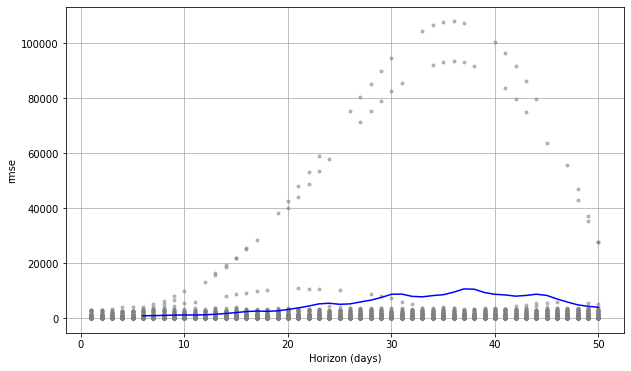

In [63]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [64]:
fig = px.line(df_final, x='ds', y='y', title='NIFTY 50')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step="year", stepmode="backward"),
                      dict(count=2, label="3y", step="year", stepmode="backward"),
                      dict(count=3, label="5y", step="year", stepmode="backward"),
                      dict(step="all")
        ])
    )
)
fig.show()

In [65]:
fig2 = px.line(prediction, x='ds', y='trend', title='NIFTY 50')

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step="year", stepmode="backward"),
                      dict(count=2, label="3y", step="year", stepmode="backward"),
                      dict(count=3, label="5y", step="year", stepmode="backward"),
                      dict(step="all")
        ])
    )
)
fig2.show()

# Prediction for next month

In [92]:
model=Prophet()
train = df_final[-150:]
train

,ds,y
3456,2020-12-15,46263.17
3457,2020-12-16,46666.46
3458,2020-12-17,46890.34
3459,2020-12-18,46960.69
3460,2020-12-21,45553.96
...,...,...
3601,2021-07-16,53140.06
3602,2021-07-19,52553.40
3603,2021-07-20,52198.51
3604,2021-07-22,52837.21


In [93]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [94]:
future_dates=model.make_future_dataframe(periods=30)
future_dates.tail()

,ds
175,2021-08-18
176,2021-08-19
177,2021-08-20
178,2021-08-21
179,2021-08-22


In [95]:
prediction=model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
175,2021-08-18,53552.753503,52676.581454,54638.911956,53005.215322,54000.146908,157.752479,157.752479,157.752479,157.752479,157.752479,157.752479,0.0,0.0,0.0,53710.505982
176,2021-08-19,53573.426551,52591.549810,54645.867900,52990.249560,54045.373646,84.611874,84.611874,84.611874,84.611874,84.611874,84.611874,0.0,0.0,0.0,53658.038426
177,2021-08-20,53594.099600,52439.439855,54528.180049,52971.378954,54094.027753,-36.089695,-36.089695,-36.089695,-36.089695,-36.089695,-36.089695,0.0,0.0,0.0,53558.009904
178,2021-08-21,53614.772648,52405.167315,54473.461505,52950.201321,54142.950162,-116.921809,-116.921809,-116.921809,-116.921809,-116.921809,-116.921809,0.0,0.0,0.0,53497.850839
179,2021-08-22,53635.445696,52408.233656,54546.408616,52932.848115,54194.278278,-116.921812,-116.921812,-116.921812,-116.921812,-116.921812,-116.921812,0.0,0.0,0.0,53518.523884


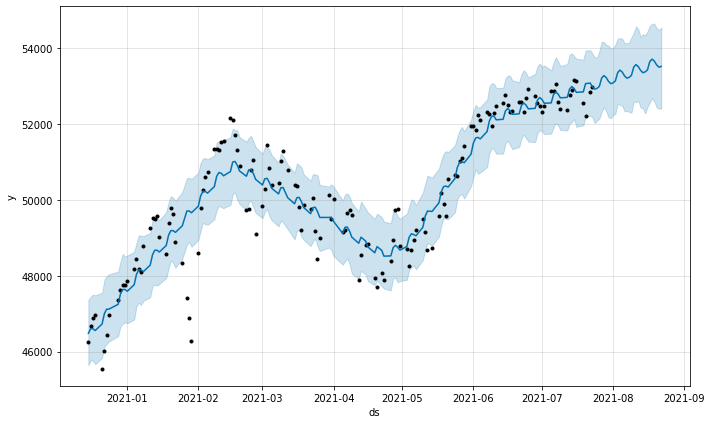

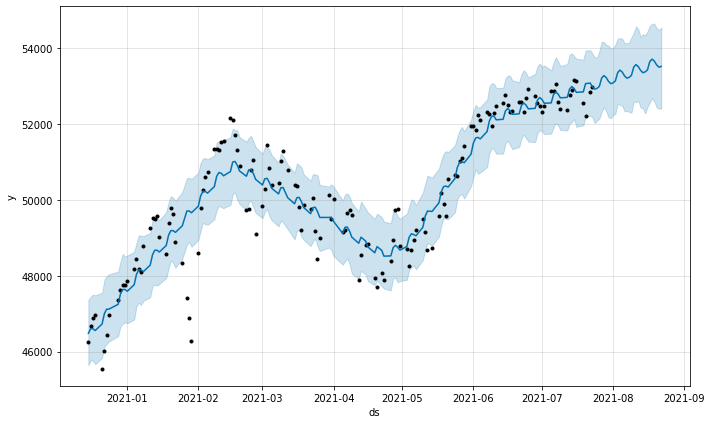

In [96]:
# prediction['trend'].plot()
model.plot(prediction)

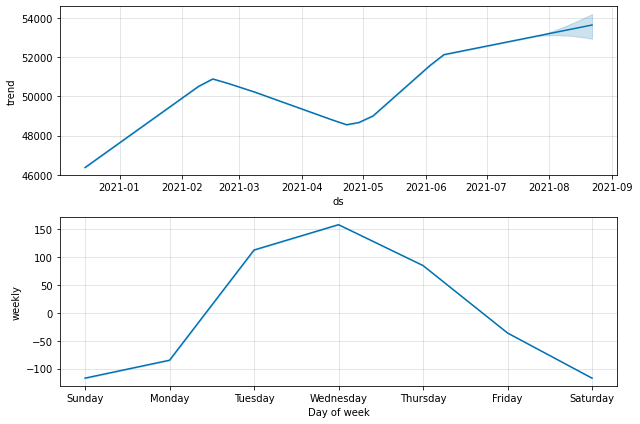

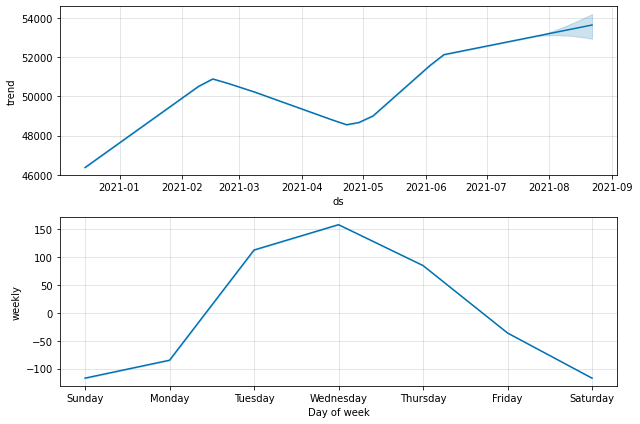

In [97]:
model.plot_components(prediction)

In [98]:
fig2 = px.line(prediction, x='ds', y='trend', title='NIFTY 50')

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step="year", stepmode="backward"),
                      dict(count=2, label="3y", step="year", stepmode="backward"),
                      dict(count=3, label="5y", step="year", stepmode="backward"),
                      dict(step="all")
        ])
    )
)
fig2.show()